# EDA: Insights Discovery
## Meridian City Hospital ER Data

**Team:** ACM  
**Date:** 2024  
**Focus:** Finding insights from cleaned and joined dataset

---

## 📊 Analysis Objectives
1. Discover patterns and trends in ER operations
2. Identify factors affecting patient outcomes
3. Understand staffing impact on performance
4. Find opportunities for improvement
5. Generate actionable insights

---

## 🎯 Quick Navigation
- **Section 1:** Load & Explore Data
- **Section 2:** Key Metrics & KPIs
- **Section 3:** Trends & Patterns
- **Section 4:** Relationships & Correlations
- **Section 5:** Segmentation Analysis
- **Section 6:** Deep Dive Insights
- **Section 7:** Summary & Recommendations


## Section 1: Load & Explore Data


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Initialize insights list
insights = []

print("✓ Imports completed")


✓ Imports completed


In [2]:
# ============================================================================
# LOAD CLEANED & JOINED DATASET
# ============================================================================

# Option 1: Load from a single joined file (if you have one)
# Uncomment and modify the path:
df = pd.read_csv('joined_data.csv')

# Option 2: Load cleaned files and join them (if needed)
# Adjust paths and join keys based on your cleaned data structure

# Example - Load cleaned files (adjust paths as needed):
# df_visits = pd.read_csv('Cleaned/Hospital_visits_out.csv')
# df_patients = pd.read_csv('Cleaned/Hospital_patients_out.csv')
# df_outcomes = pd.read_csv('Cleaned/Hospital_outcome_out.csv')
# df_facility = pd.read_csv('Cleaned/Hospital_facility_out.csv')
# df_staffing = pd.read_csv('Cleaned/Hospital_Staffing_out.csv')
# 
# # Join datasets (adjust join keys based on your data)
# df = df_visits.merge(df_patients, on='PatientID', how='left')
# df = df.merge(df_outcomes, on='VisitID', how='left')
# df = df.merge(df_facility, on='FacilityID', how='left')
# df = df.merge(df_staffing, on='FacilityID', how='left')

# TEMPORARY: If you don't have the joined file yet, load one to test
# Replace this with your actual joined file path
df = pd.read_csv('joined_data.csv')  # Replace with your joined file

print("=" * 80)
print("DATASET LOADED")
print("=" * 80)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Quick overview
print("\n" + "=" * 80)
print("FIRST FEW ROWS")
print("=" * 80)
display(df.head())

print("\n" + "=" * 80)
print("COLUMN INFORMATION")
print("=" * 80)
print(f"\nTotal columns: {len(df.columns)}")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    print(f"  {i:2d}. {col:<40} ({dtype})")

print("\n" + "=" * 80)
print("BASIC INFO")
print("=" * 80)
df.info()

insights.append(f"Dataset contains {df.shape[0]:,} records with {df.shape[1]} features")


DATASET LOADED
Shape: 15,000 rows × 17 columns
Memory: 13.61 MB

FIRST FEW ROWS


,Visit ID,Patient ID,Hospital ID,Arrival Time,Registration Start,Registration End,Triage Start,Triage End,Doctor Seen,Exit Time,Triage Level,Arrival To Exit,Arrived At Shift,Right_Patient ID,Age,Gender,Insurance
0,V111883,MC180325-3746,MC_ER_EAST,2025-02-16 14:06:00,2025-02-16 14:08:00,2025-02-16 14:15:00,2025-02-16 14:20:00,2025-02-16 14:35:00,2025-02-16 15:09:00,2025-02-16 16:52:00,urgent,166,DAY,MC180325-3746,98,MALE,UNINSURED
1,V106060,MC180325-3746,MC_ER_EAST,2025-02-15 11:16:00,2025-02-15 11:20:00,2025-02-15 11:26:00,2025-02-15 11:33:00,2025-02-15 11:39:00,2025-02-15 12:09:00,2025-02-15 13:45:00,nonurgent,149,DAY,MC180325-3746,98,MALE,UNINSURED
2,V113266,MC180325-3746,MC_ER_EAST,2025-01-14 13:26:00,2025-01-14 13:29:00,2025-01-14 13:39:00,2025-01-14 13:42:00,2025-01-14 13:54:00,2025-01-14 14:27:00,2025-01-14 15:24:00,nonurgent,118,DAY,MC180325-3746,98,MALE,UNINSURED
3,V104373,MC180325-3746,MC_ER_EAST,2025-01-14 17:57:00,2025-01-14 17:58:00,2025-01-14 18:08:00,2025-01-14 18:11:00,2025-01-14 18:25:00,2025-01-14 18:58:00,2025-01-14 21:02:00,emergent,185,EVENING,MC180325-3746,98,MALE,UNINSURED
4,V105553,MC180325-2767,MC_ER_EAST,2025-03-21 14:06:00,2025-03-21 14:09:00,2025-03-21 14:19:00,2025-03-21 14:21:00,2025-03-21 14:38:00,2025-03-21 15:05:00,2025-03-21 16:31:00,urgent,145,DAY,MC180325-2767,37,FEMALE,UNINSURED



COLUMN INFORMATION

Total columns: 17
   1. Visit ID                                 (object)
   2. Patient ID                               (object)
   3. Hospital ID                              (object)
   4. Arrival Time                             (object)
   5. Registration Start                       (object)
   6. Registration End                         (object)
   7. Triage Start                             (object)
   8. Triage End                               (object)
   9. Doctor Seen                              (object)
  10. Exit Time                                (object)
  11. Triage Level                             (object)
  12. Arrival To Exit                          (int64)
  13. Arrived At Shift                         (object)
  14. Right_Patient ID                         (object)
  15. Age                                      (int64)
  16. Gender                                   (object)
  17. Insurance                                (object)

BASIC INFO

## Section 2: Key Metrics & KPIs


In [3]:
# ============================================================================
# KEY METRICS & KPIs
# ============================================================================

print("=" * 80)
print("KEY METRICS & KPIs")
print("=" * 80)

# Identify key columns (adjust based on your actual column names)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
date_cols = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]

print(f"\nNumerical columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Date columns: {len(date_cols)}")

# Summary statistics for numerical columns
if len(numeric_cols) > 0:
    print("\n" + "-" * 80)
    print("SUMMARY STATISTICS")
    print("-" * 80)
    display(df[numeric_cols].describe().T)

# Key metrics (customize based on your columns)
print("\n" + "-" * 80)
print("KEY METRICS")
print("-" * 80)

# Example metrics (adjust column names based on your data)
metrics = {}

# Check for common hospital metrics
if 'Patient Satisfaction' in df.columns:
    metrics['Avg Patient Satisfaction'] = df['Patient Satisfaction'].mean()
    metrics['Min Patient Satisfaction'] = df['Patient Satisfaction'].min()
    metrics['Max Patient Satisfaction'] = df['Patient Satisfaction'].max()

# Add more metrics based on your columns
# if 'Wait Time' in df.columns:
#     metrics['Avg Wait Time'] = df['Wait Time'].mean()
# if 'Length of Stay' in df.columns:
#     metrics['Avg Length of Stay'] = df['Length of Stay'].mean()

for key, value in metrics.items():
    print(f"{key}: {value:.2f}")
    insights.append(f"{key}: {value:.2f}")

# Value counts for categorical columns (top categories)
print("\n" + "-" * 80)
print("CATEGORICAL DISTRIBUTIONS (TOP 5)")
print("-" * 80)
for col in categorical_cols[:5]:  # First 5 categorical columns
    print(f"\n{col}:")
    value_counts = df[col].value_counts().head(5)
    display(value_counts.to_frame('Count'))


KEY METRICS & KPIs

Numerical columns: 2
Categorical columns: 15
Date columns: 2

--------------------------------------------------------------------------------
SUMMARY STATISTICS
--------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Arrival To Exit,15000.0,172.142667,31.638036,73.0,150.0,171.0,193.0,321.0
Age,15000.0,49.625000,28.560349,1.0,25.0,49.0,75.0,99.0



--------------------------------------------------------------------------------
KEY METRICS
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
CATEGORICAL DISTRIBUTIONS (TOP 5)
--------------------------------------------------------------------------------

Visit ID:


,Count
Visit ID,
V111883,1
V112682,1
V110666,1
V106389,1
V106122,1



Patient ID:


,Count
Patient ID,
MC180325-1409,12
MC180325-1063,11
MC180325-1240,11
MC180325-4355,11
MC180325-0429,10



Hospital ID:


,Count
Hospital ID,
MC_ER_EAST,15000



Arrival Time:


,Count
Arrival Time,
2025-02-02 10:18:00,5
2025-02-01 07:34:00,5
2025-01-29 11:39:00,4
2025-03-07 10:31:00,4
2025-02-08 06:48:00,4



Registration Start:


,Count
Registration Start,
2025-03-01 11:48:00,4
2025-01-10 09:08:00,4
2025-01-29 10:00:00,4
2025-03-28 15:20:00,3
2025-01-02 12:22:00,3


## Section 3: Trends & Patterns


TIME-BASED TRENDS & PATTERNS

Found date columns: ['Arrival Time', 'Registration Start', 'Registration End', 'Triage Start', 'Triage End', 'Doctor Seen', 'Exit Time']

Analyzing trends by: Arrival Time


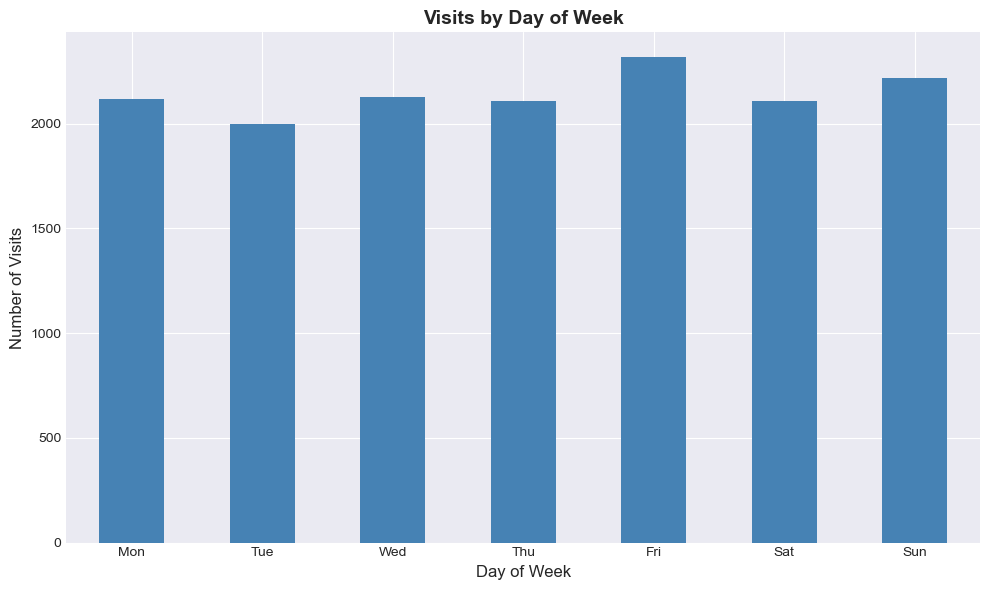

In [4]:
# ============================================================================
# TIME-BASED TRENDS
# ============================================================================

print("=" * 80)
print("TIME-BASED TRENDS & PATTERNS")
print("=" * 80)

# Find date columns and analyze trends
date_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        # Try to detect date columns
        sample = df[col].dropna().head(10)
        if len(sample) > 0:
            try:
                pd.to_datetime(sample)
                date_columns.append(col)
            except:
                pass

if len(date_columns) > 0:
    print(f"\nFound date columns: {date_columns}")
    
    # Analyze trends for first date column
    date_col = date_columns[0]
    print(f"\nAnalyzing trends by: {date_col}")
    
    # Convert to datetime
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    
    # Extract time components
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['DayOfWeek'] = df[date_col].dt.dayofweek
    df['Hour'] = df[date_col].dt.hour if df[date_col].dt.hour.notna().any() else None
    
    # Monthly trends (if we have a metric)
    if 'Patient Satisfaction' in df.columns:
        monthly_satisfaction = df.groupby(['Year', 'Month'])['Patient Satisfaction'].mean()
        plt.figure(figsize=(14, 6))
        monthly_satisfaction.plot(kind='line', marker='o')
        plt.title('Monthly Patient Satisfaction Trend', fontsize=14, fontweight='bold')
        plt.xlabel('Year-Month', fontsize=12)
        plt.ylabel('Average Satisfaction', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        insights.append(f"Monthly patient satisfaction ranges from {monthly_satisfaction.min():.2f} to {monthly_satisfaction.max():.2f}")
    
    # Day of week patterns
    if 'DayOfWeek' in df.columns:
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()
        day_of_week_counts.index = [day_names[i] for i in day_of_week_counts.index]
        
        plt.figure(figsize=(10, 6))
        day_of_week_counts.plot(kind='bar', color='steelblue')
        plt.title('Visits by Day of Week', fontsize=14, fontweight='bold')
        plt.xlabel('Day of Week', fontsize=12)
        plt.ylabel('Number of Visits', fontsize=12)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        insights.append(f"Busiest day: {day_of_week_counts.idxmax()} with {day_of_week_counts.max():,} visits")
else:
    print("\n⚠ No date columns detected. Skipping time-based analysis.")
    print("   If you have date columns, ensure they're in a recognizable format.")


## Section 4: Relationships & Correlations


RELATIONSHIPS & CORRELATIONS


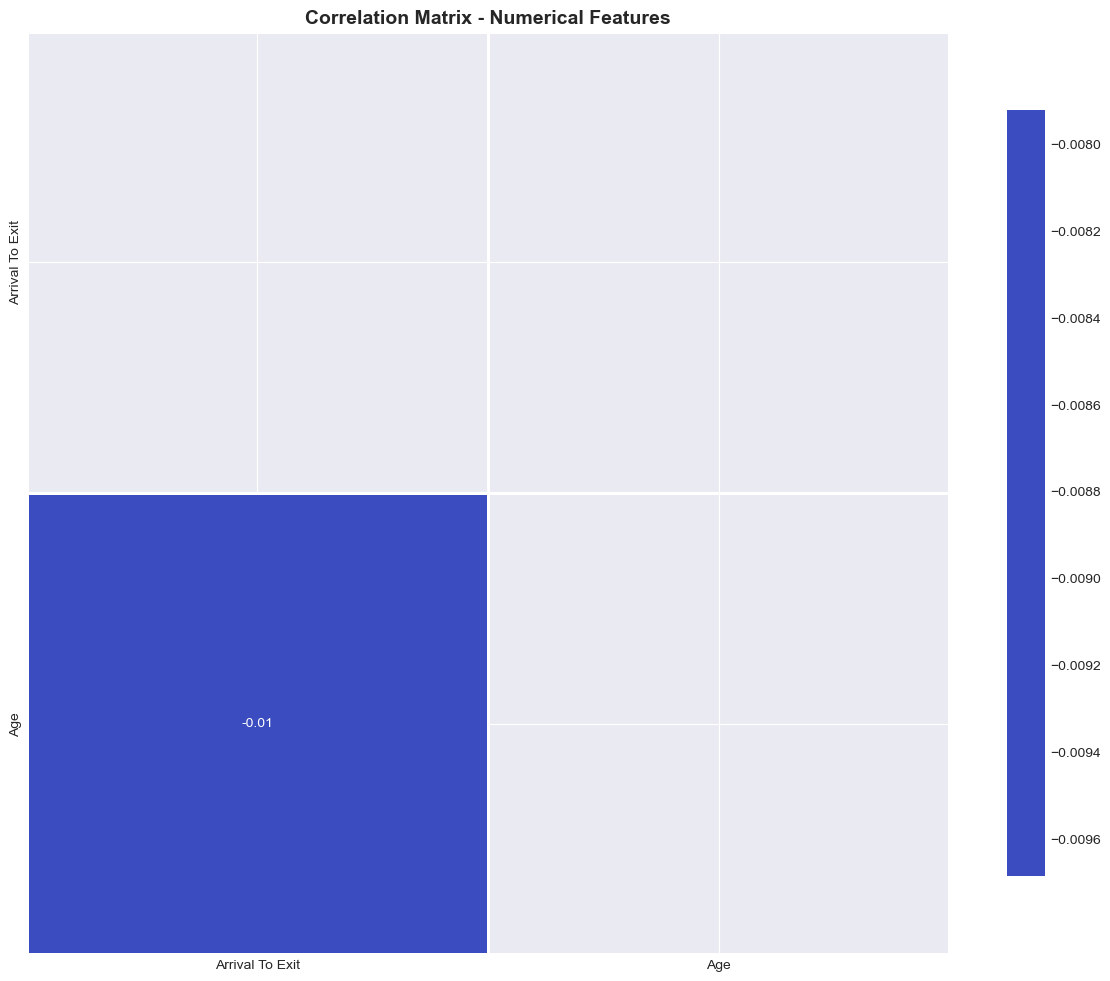


--------------------------------------------------------------------------------
STRONG CORRELATIONS (|r| > 0.5)
--------------------------------------------------------------------------------
No strong correlations found (|r| > 0.5)

--------------------------------------------------------------------------------
CATEGORICAL RELATIONSHIPS
--------------------------------------------------------------------------------


In [5]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("=" * 80)
print("RELATIONSHIPS & CORRELATIONS")
print("=" * 80)

if len(numeric_cols) > 1:
    # Correlation matrix
    correlation_matrix = df[numeric_cols].corr()
    
    # Visualize correlation heatmap
    plt.figure(figsize=(max(12, len(numeric_cols)), max(10, len(numeric_cols))))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations
    print("\n" + "-" * 80)
    print("STRONG CORRELATIONS (|r| > 0.5)")
    print("-" * 80)
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append({
                    'Feature 1': col1,
                    'Feature 2': col2,
                    'Correlation': corr_val
                })
                insights.append(f"Strong correlation ({corr_val:.3f}) between {col1} and {col2}")
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        display(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))
    else:
        print("No strong correlations found (|r| > 0.5)")

# ============================================================================
# CATEGORICAL RELATIONSHIPS
# ============================================================================

print("\n" + "-" * 80)
print("CATEGORICAL RELATIONSHIPS")
print("-" * 80)

# Analyze relationships between categorical variables and numerical outcomes
if 'Patient Satisfaction' in df.columns and len(categorical_cols) > 0:
    print("\nPatient Satisfaction by Category:")
    for col in categorical_cols[:3]:  # First 3 categorical columns
        if df[col].nunique() < 20:  # Only if reasonable number of categories
            satisfaction_by_cat = df.groupby(col)['Patient Satisfaction'].agg(['mean', 'count', 'std'])
            satisfaction_by_cat = satisfaction_by_cat.sort_values('mean', ascending=False)
            
            print(f"\n{col}:")
            display(satisfaction_by_cat.head(10))
            
            # Visualize
            plt.figure(figsize=(12, 6))
            satisfaction_by_cat['mean'].head(10).plot(kind='bar', color='coral')
            plt.title(f'Average Patient Satisfaction by {col}', fontsize=14, fontweight='bold')
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Average Satisfaction', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            
            best_category = satisfaction_by_cat['mean'].idxmax()
            worst_category = satisfaction_by_cat['mean'].idxmin()
            insights.append(f"Highest satisfaction in {col}: {best_category} ({satisfaction_by_cat.loc[best_category, 'mean']:.2f})")
            insights.append(f"Lowest satisfaction in {col}: {worst_category} ({satisfaction_by_cat.loc[worst_category, 'mean']:.2f})")


## Section 5: Segmentation Analysis


In [6]:
# ============================================================================
# SEGMENTATION & GROUPING ANALYSIS
# ============================================================================

print("=" * 80)
print("SEGMENTATION ANALYSIS")
print("=" * 80)

# Segment analysis - identify high/low performers
if 'Patient Satisfaction' in df.columns:
    # Create satisfaction segments
    df['Satisfaction_Segment'] = pd.cut(
        df['Patient Satisfaction'], 
        bins=[0, 2, 3, 4, 5], 
        labels=['Low (1-2)', 'Medium (3)', 'High (4)', 'Very High (5)']
    )
    
    print("\n" + "-" * 80)
    print("SATISFACTION SEGMENTS")
    print("-" * 80)
    segment_counts = df['Satisfaction_Segment'].value_counts()
    display(segment_counts.to_frame('Count'))
    
    # Analyze what differentiates segments
    print("\n" + "-" * 80)
    print("SEGMENT CHARACTERISTICS")
    print("-" * 80)
    
    # Compare segments across other variables
    for col in numeric_cols[:5]:  # First 5 numerical columns
        if col != 'Patient Satisfaction':
            segment_means = df.groupby('Satisfaction_Segment')[col].mean()
            print(f"\n{col} by Satisfaction Segment:")
            display(segment_means.to_frame('Mean'))
    
    insights.append(f"Satisfaction distribution: {segment_counts.to_dict()}")

# ============================================================================
# OUTLIER ANALYSIS
# ============================================================================

print("\n" + "-" * 80)
print("OUTLIER ANALYSIS")
print("-" * 80)

# Identify outliers using IQR method for key numerical columns
outlier_cols = numeric_cols[:5]  # Analyze first 5 numerical columns
outlier_summary = []

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    if outlier_count > 0:
        outlier_summary.append({
            'Column': col,
            'Outlier Count': outlier_count,
            'Outlier %': f"{outlier_pct:.2f}%",
            'Lower Bound': f"{lower_bound:.2f}",
            'Upper Bound': f"{upper_bound:.2f}"
        })
        
        if outlier_pct > 5:
            insights.append(f"⚠ {col}: {outlier_pct:.1f}% outliers detected")

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)


SEGMENTATION ANALYSIS

--------------------------------------------------------------------------------
OUTLIER ANALYSIS
--------------------------------------------------------------------------------


,Column,Outlier Count,Outlier %,Lower Bound,Upper Bound
0,Arrival To Exit,122,0.81%,85.50,257.50


## Section 6: Deep Dive Insights


DEEP DIVE INSIGHTS

--------------------------------------------------------------------------------
6.1 DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------


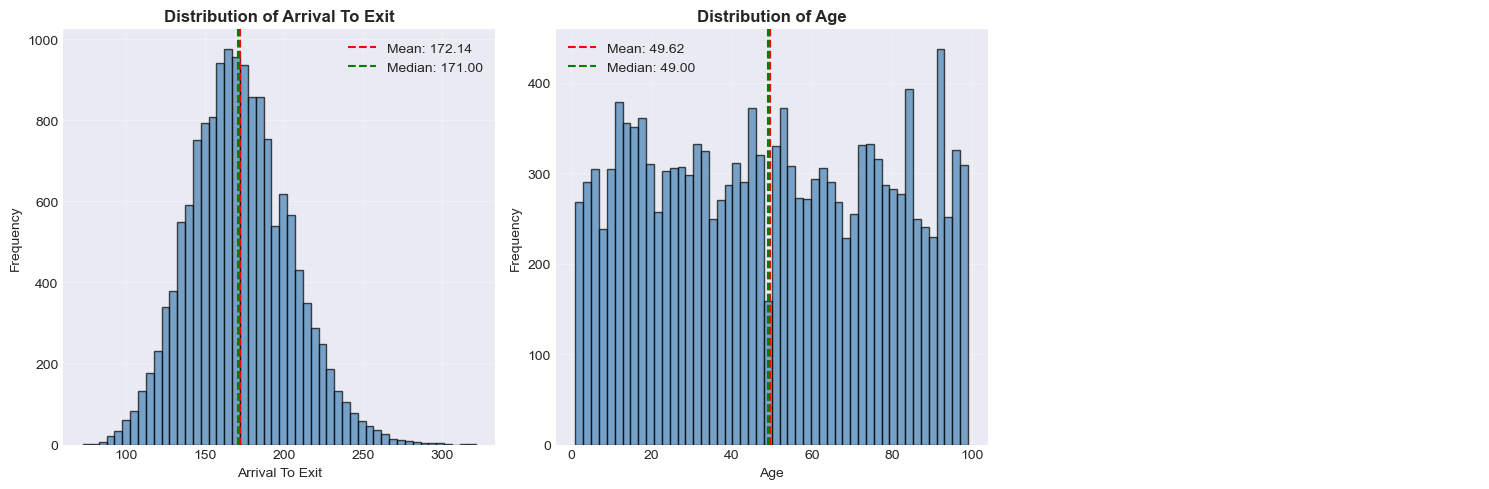


--------------------------------------------------------------------------------
6.2 COMPARATIVE ANALYSIS
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
6.3 PATTERN DISCOVERY
--------------------------------------------------------------------------------

💡 Custom Analysis Areas:
   - Peak hours/days for different metrics
   - Facility/location performance differences
   - Staffing impact on outcomes
   - Patient demographics and outcomes
   - Seasonal/cyclical patterns


In [7]:
# ============================================================================
# DEEP DIVE: CUSTOM ANALYSIS
# ============================================================================

print("=" * 80)
print("DEEP DIVE INSIGHTS")
print("=" * 80)

# ============================================================================
# 6.1 DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "-" * 80)
print("6.1 DISTRIBUTION ANALYSIS")
print("-" * 80)

# Visualize distributions of key numerical variables
key_vars = numeric_cols[:6]  # First 6 numerical columns
n_cols = 3
n_rows = (len(key_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if len(key_vars) > 1 else [axes]

for idx, col in enumerate(key_vars):
    ax = axes[idx]
    df[col].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    ax.legend()

# Hide extra subplots
for idx in range(len(key_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ============================================================================
# 6.2 COMPARATIVE ANALYSIS
# ============================================================================

print("\n" + "-" * 80)
print("6.2 COMPARATIVE ANALYSIS")
print("-" * 80)

# Compare top vs bottom performers (if we have a target metric)
if 'Patient Satisfaction' in df.columns:
    # Top 20% vs Bottom 20%
    threshold_high = df['Patient Satisfaction'].quantile(0.8)
    threshold_low = df['Patient Satisfaction'].quantile(0.2)
    
    high_satisfaction = df[df['Patient Satisfaction'] >= threshold_high]
    low_satisfaction = df[df['Patient Satisfaction'] <= threshold_low]
    
    print(f"\nHigh Satisfaction (≥{threshold_high:.1f}): {len(high_satisfaction):,} records")
    print(f"Low Satisfaction (≤{threshold_low:.1f}): {len(low_satisfaction):,} records")
    
    # Compare key metrics
    comparison_cols = [col for col in numeric_cols if col != 'Patient Satisfaction'][:5]
    
    comparison_data = []
    for col in comparison_cols:
        comparison_data.append({
            'Metric': col,
            'High Satisfaction': high_satisfaction[col].mean(),
            'Low Satisfaction': low_satisfaction[col].mean(),
            'Difference': high_satisfaction[col].mean() - low_satisfaction[col].mean()
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    display(comparison_df)
    
    # Identify key differentiators
    comparison_df['Abs Difference'] = comparison_df['Difference'].abs()
    top_differentiators = comparison_df.nlargest(3, 'Abs Difference')
    print("\nTop Differentiators between High and Low Satisfaction:")
    for _, row in top_differentiators.iterrows():
        insights.append(
            f"Key difference: {row['Metric']} - "
            f"High: {row['High Satisfaction']:.2f}, Low: {row['Low Satisfaction']:.2f} "
            f"(Diff: {row['Difference']:.2f})"
        )

# ============================================================================
# 6.3 PATTERN DISCOVERY
# ============================================================================

print("\n" + "-" * 80)
print("6.3 PATTERN DISCOVERY")
print("-" * 80)

# Look for interesting patterns
print("\n💡 Custom Analysis Areas:")
print("   - Peak hours/days for different metrics")
print("   - Facility/location performance differences")
print("   - Staffing impact on outcomes")
print("   - Patient demographics and outcomes")
print("   - Seasonal/cyclical patterns")

# Add your custom analysis here based on your specific columns
# Example:
# if 'Facility' in df.columns and 'Patient Satisfaction' in df.columns:
#     facility_performance = df.groupby('Facility')['Patient Satisfaction'].agg(['mean', 'count'])
#     facility_performance = facility_performance.sort_values('mean', ascending=False)
#     print("\nFacility Performance:")
#     display(facility_performance)


## Section 7: Summary & Recommendations


In [8]:
# ============================================================================
# INSIGHTS SUMMARY
# ============================================================================

print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n📊 DATASET OVERVIEW")
print(f"   • Total records: {df.shape[0]:,}")
print(f"   • Total features: {df.shape[1]}")
print(f"   • Numerical features: {len(numeric_cols)}")
print(f"   • Categorical features: {len(categorical_cols)}")

print("\n🔍 KEY INSIGHTS DISCOVERED:")
print("-" * 80)
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

# ============================================================================
# RECOMMENDATIONS
# ============================================================================

print("\n" + "=" * 80)
print("RECOMMENDATIONS")
print("=" * 80)

recommendations = []

# Generate recommendations based on insights
if 'Patient Satisfaction' in df.columns:
    if df['Patient Satisfaction'].mean() < 3.5:
        recommendations.append("⚠️ Patient satisfaction is below average - investigate root causes")
    
    # Check for satisfaction variations
    if 'Satisfaction_Segment' in df.columns:
        low_satisfaction_pct = (df['Satisfaction_Segment'] == 'Low (1-2)').sum() / len(df) * 100
        if low_satisfaction_pct > 10:
            recommendations.append(f"⚠️ {low_satisfaction_pct:.1f}% of patients have low satisfaction - prioritize improvement")

# Add more recommendations based on your analysis
if len(outlier_summary) > 0:
    high_outlier_cols = [row['Column'] for row in outlier_summary if float(row['Outlier %'].rstrip('%')) > 10]
    if high_outlier_cols:
        recommendations.append(f"⚠️ High outlier rates in: {', '.join(high_outlier_cols)} - investigate data quality or process issues")

print("\n💡 RECOMMENDATIONS:")
print("-" * 80)
if recommendations:
    for i, rec in enumerate(recommendations, 1):
        print(f"   {i}. {rec}")
else:
    print("   (Add custom recommendations based on your analysis)")

# ============================================================================
# NEXT STEPS
# ============================================================================

print("\n" + "=" * 80)
print("NEXT STEPS")
print("=" * 80)

next_steps = [
    "Review insights with team",
    "Validate findings with domain experts",
    "Prioritize areas for improvement",
    "Develop action plans for key recommendations",
    "Create visualizations for presentation",
    "Prepare data for modeling (if needed)"
]

print("\n📋 SUGGESTED NEXT STEPS:")
for i, step in enumerate(next_steps, 1):
    print(f"   {i}. {step}")

# ============================================================================
# EXPORT INSIGHTS
# ============================================================================

print("\n" + "=" * 80)
print("EXPORTING INSIGHTS")
print("=" * 80)

timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
insights_report = f"""
EDA INSIGHTS REPORT - Meridian City Hospital ER
===============================================
Generated: {timestamp}
Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns

KEY INSIGHTS
------------
"""

for i, insight in enumerate(insights, 1):
    insights_report += f"{i}. {insight}\n"

insights_report += f"""

RECOMMENDATIONS
---------------
"""

for i, rec in enumerate(recommendations, 1):
    insights_report += f"{i}. {rec}\n"

insights_report += f"""

NEXT STEPS
----------
"""

for i, step in enumerate(next_steps, 1):
    insights_report += f"{i}. {step}\n"

# Write to file
output_file = 'eda_insights_report.txt'
with open(output_file, 'w') as f:
    f.write(insights_report)

print(f"✓ Insights exported to: {output_file}")
print("\n" + "=" * 80)
print("✅ EDA COMPLETE!")
print("=" * 80)


KEY INSIGHTS SUMMARY

📊 DATASET OVERVIEW
   • Total records: 15,000
   • Total features: 21
   • Numerical features: 2
   • Categorical features: 15

🔍 KEY INSIGHTS DISCOVERED:
--------------------------------------------------------------------------------
   1. Dataset contains 15,000 records with 17 features
   2. Busiest day: Fri with 2,320 visits

RECOMMENDATIONS

💡 RECOMMENDATIONS:
--------------------------------------------------------------------------------
   (Add custom recommendations based on your analysis)

NEXT STEPS

📋 SUGGESTED NEXT STEPS:
   1. Review insights with team
   2. Validate findings with domain experts
   3. Prioritize areas for improvement
   4. Develop action plans for key recommendations
   5. Create visualizations for presentation
   6. Prepare data for modeling (if needed)

EXPORTING INSIGHTS
✓ Insights exported to: eda_insights_report.txt

✅ EDA COMPLETE!
